# `PyGraph` pour manipuler des graphes

Appréhender dans un objet les deux aspects des graphes :

1. structure mathématique : module `networkx`
2. _dessin_ : module `graphviz`

## Exemple : Activité de 2-Coloration

### Visualiser...

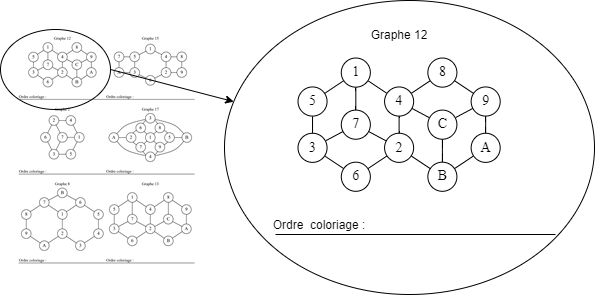

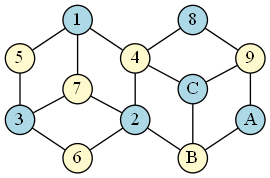

### Manipuler... y compris dans un programme

**Un fichier `json` pour stocker les infos des graphes...**

```python
[
    [0, []],
    [8, [[0,1], [1,2], [2,4], [4,6], [6,7], [7,5], [5,3], [3,0], [4,5]]],
    [7, [[0,4], [4,2], [0,6], [0,3], [2,6], [2,5], [5,1], [6,1], [1,3]]],
    [0, []],
    [8, [[0,5], [5,7], [5,3], [5,4], [7,6], [6,4], [4,1], [4,2], [2,3]]],
    ...
    [11, [[0,5], [0,7], [0,8], [0,6], [1,5], [1,6], [1,9], [2,5], [2,7], [3,6], [3,8], [4,7], [4,8], [4,10], [9,2], [9,3], [10,3], [10,2]]]
]
```

**Une fonction pour créer tous les graphes...**

```python
def create_list_of_graphs():
    l_graphs = [None]
    with open('graphes.json') as file_in:
        datas = json.load(file_in)
        for nodes_count, edges in datas:
            g = pygraph.Graph(nodes_count)
            g.add_edges_from(edges)
            l_graphs.append(g)
    return l_graphs
```

```python
G = create_list_of_graphs()
```

**Et pouvoir les manipuler...**

```python
for i in range(17):
    G[i].colorise()
```

```python
def is_bfs(ordre, g):
    ordre = [int(e, 16)-1 for e in ordre]
    niveaux = g.bfs(ordre[0])
    return verifier(ordre, niveaux)
```

```python
>>> is_hamiltonien('15482367', G[5])
False
>>> is_bfs('4217653', G[2])
True
>>> verif_solution(G[8], 'B815A3', '76924')
True
``` 

## Importer et utiliser `pygraph`

In [1]:
import pygraph

c:\users\sebho\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\sebho\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\users\sebho\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Créer un graphe aléatoire (non orienté)

In [2]:
alea = pygraph.Graph(6, random=True)

### Visualiser

In [3]:
alea.view

### Créer un graphe sans arète

In [17]:
g7 = pygraph.Graph(7)

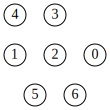

In [19]:
g7.view

### Ajouter une arète

In [21]:
g7.add_edge(0, 2)

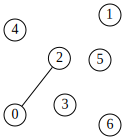

In [22]:
g7.view

### Ajouter plusieurs arètes

In [27]:
g7.add_edges_from([(0,4), (4,2), (0,6), (0,3), (2,6), (2,5), (5,1), (6,1), (1,3)])

In [28]:
g7.view

### Retirer des arètes

In [29]:
g7.remove_edge(0, 2)

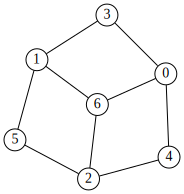

In [30]:
g7.view

### Retrait de noeuds

In [31]:
g7.remove_node(6)

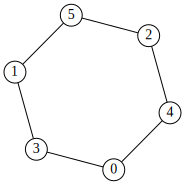

In [32]:
g7.view

### Positionner les sommets

In [33]:
G2 = pygraph.Graph(7)
G2.add_edges_from([(0,4), (4,2), (0,6), (0,3), (2,6), (2,5), (5,1), (6,1), (1,3)])

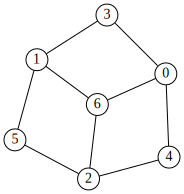

In [34]:
G2.view

In [35]:
G2.position([(6, 0, 0), (5, -1, 0), (0, 1, 0), (2, -0.5, -1), (1, -0.5, 1), (4, 0.5, -1), (3, 0.5, 1)])

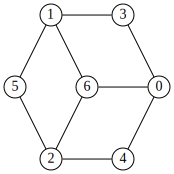

In [36]:
G2.view

### Changer l'échelle

In [37]:
G2.scale(0.7)

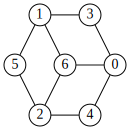

In [38]:
G2.view

### Bouger un sommet

_todo : corriger le bug qui fait que l'échelle n'est pas conservée_

In [40]:
G2.move(0, 1, 0)

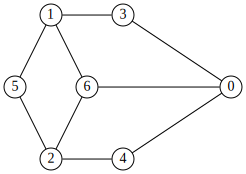

In [41]:
G2.view

In [42]:
G2.scale(0.7)

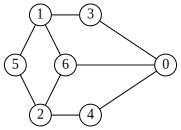

In [43]:
G2.view

### Changer les étiquettes

In [44]:
G2.label_off()

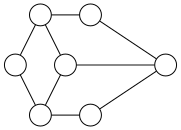

In [45]:
G2.view

In [46]:
PEOPLE = '🧑🧒🧓🧔👦👧👨👩👴👵👶'

In [48]:
G2.set_labels(PEOPLE)

In [49]:
G2.label_on()

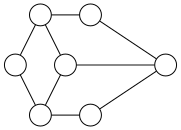

In [50]:
G2.view

### Changer la taille d'un sommet

In [51]:
G2.label_off()

In [54]:
G2.resize(0.1)

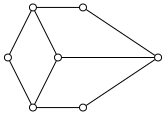

In [55]:
G2.view

In [56]:
G2.scale(0.3)

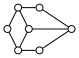

In [57]:
G2.view

### Sauver dans un fichier

In [70]:
G2.write('small_g2')

## Algorithmes

### Coloration

In [58]:
G2.colorise()

2

In [61]:
G2.color_on()
G2.view

### Parcours

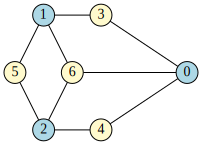

In [63]:
G2.resize()
G2.set_labels('0123456')
G2.label_on()
G2.scale(0.8)
G2.view

**En largeur**

In [69]:
G2.bfs(6)

[[6], [0, 2, 1], [4, 3, 5]]

In [9]:
G2.bfs(0)

[[0], [4, 6, 3], [2, 1], [5]]

In [66]:
list(G2.neighbors(0))

[4, 6, 3]

In [68]:
G2.degree(5)

2

## Modélisation du jeu de Lewthwaite

In [8]:
import lewthwaite as lw

In [9]:
jeu = lw.Lewthwaite(5)

In [10]:
jeu.start()

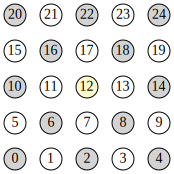

In [11]:
jeu.view

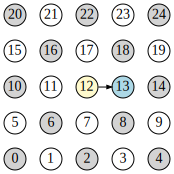

In [12]:
jeu.play(13)

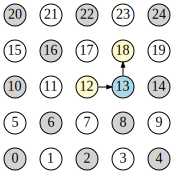

In [13]:
jeu.play(18)

## Et pour finir...

Au moment de terminer ce notebook, je me suis souvenu que c'était l'anniversaire de ma belle-soeur.  J'ai récupéré le _pygraph_ asocié au jeu de lewthwaite :

In [14]:
g = jeu.graph

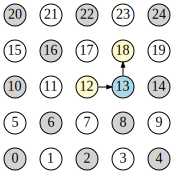

In [15]:
g.view

J'ai effectué une coloration aléatoire des sommets...

In [16]:
import random

In [17]:
for nid in g.node_ids():
    g.color_on(nid, random.randint(0,5))

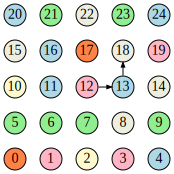

In [18]:
g.view

J'ai changé les étiquettes...

In [19]:
MSG = 'SAI🌸🌼RERE🌼IVJO🌷N🌸XY💮NAUE🌼'

In [20]:
g.set_labels(MSG)
g.label_on()

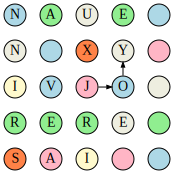

In [21]:
g.view

J'ai _joué_ les coups qu'il fallait pour faire le message...

In [22]:
COUPS = [13,18,23,22,17,16,21,20,15,10,11,6,5,0,1,2,7,8,3,4,9,14,19,24]

In [23]:
jeu.auto(COUPS)

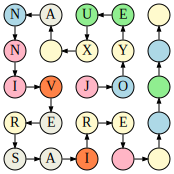

In [28]:
jeu.view

Ah oui de jouer les coups enlève mes couleurs aléatoires... pas grave on refait :

In [27]:
for nid in g.node_ids():
    g.color_on(nid, random.randint(0,5))

In [104]:
g.write('anniv')